In [0]:
/content/drive/My Drive/Final Year Project/gender.zip

SyntaxError: ignored

In [1]:
from zipfile import ZipFile
filename = '/content/drive/My Drive/Final Year Project/Gender.zip'
with ZipFile(filename,'r') as zip:
  zip.extractall()
  print("Done")

Done


In [2]:
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, Activation, Flatten ,Conv2D, MaxPooling2D, BatchNormalization,Convolution2D
from keras.models import Sequential 
from keras import optimizers
from keras import backend as k
from keras.preprocessing import image
import numpy as np

Using TensorFlow backend.


In [0]:
image_size = 100
batchsize = 32
train = 'Gender'
test = 'Gender_test'

In [0]:
if k.image_data_format() == 'channel_first':
    input_shape = (3, image_size,image_size)
else:
    input_shape = (image_size,image_size,3)

In [0]:
train_data = ImageDataGenerator(
    rescale = 1. / 255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip= True)

test_data = ImageDataGenerator(rescale = 1. / 255)

In [6]:
train_generator = train_data.flow_from_directory(
    train,
    target_size= (image_size,image_size),
    batch_size=batchsize,
    class_mode='binary')
test_generator = test_data.flow_from_directory(
    test,
    target_size=(image_size,image_size),
    batch_size=batchsize,
    class_mode='binary')

Found 9228 images belonging to 2 classes.
Found 8692 images belonging to 2 classes.


In [0]:
####Neural Network###
model = Sequential()
model.add(Conv2D(32, (3,3), padding="same", activation='sigmoid', input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(padding="same"))

model.add(Conv2D(32, (3,3), padding='same', activation='sigmoid'))
model.add(MaxPooling2D(padding="same"))
model.add(BatchNormalization())

model.add(Conv2D(64, (3,3), padding="same",activation='relu'))
model.add(MaxPooling2D(padding="same"))

model.add(Conv2D(64, (3,3), padding="same",activation='relu'))
model.add(MaxPooling2D(padding="same"))
model.add(BatchNormalization())

model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [8]:

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 100, 32)      896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 100, 100, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 25, 25, 32)        128       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 64)       

In [9]:
gender = model.fit_generator(
    train_generator,
    epochs = 20,
    shuffle='true',
    validation_data = test_generator )

Epoch 1/20
289/289 [==============================] - 62s 216ms/step - loss: 0.6088 - accuracy: 0.6909 - val_loss: 1.9712 - val_accuracy: 0.4991
Epoch 2/20
289/289 [==============================] - 55s 191ms/step - loss: 0.4751 - accuracy: 0.7742 - val_loss: 0.4267 - val_accuracy: 0.7861
Epoch 3/20
289/289 [==============================] - 55s 191ms/step - loss: 0.4109 - accuracy: 0.8136 - val_loss: 0.2029 - val_accuracy: 0.8285
Epoch 4/20
289/289 [==============================] - 55s 191ms/step - loss: 0.3759 - accuracy: 0.8375 - val_loss: 0.5003 - val_accuracy: 0.8535
Epoch 5/20
289/289 [==============================] - 55s 189ms/step - loss: 0.3466 - accuracy: 0.8516 - val_loss: 0.2423 - val_accuracy: 0.8649
Epoch 6/20
289/289 [==============================] - 55s 189ms/step - loss: 0.3281 - accuracy: 0.8586 - val_loss: 0.1475 - val_accuracy: 0.8737
Epoch 7/20
289/289 [==============================] - 55s 190ms/step - loss: 0.3137 - accuracy: 0.8699 - val_loss: 0.1991 - val_ac

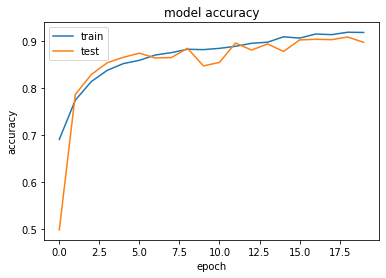

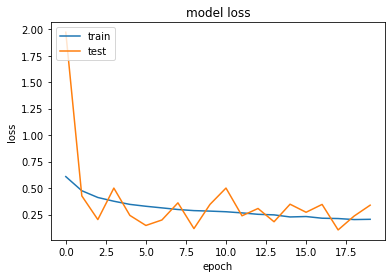

In [10]:
import matplotlib.pyplot as plt

# Visualizing the training process
plt.plot(gender.history['accuracy'])
plt.plot(gender.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(gender.history['loss'])
plt.plot(gender.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
model.save('gender-acc89-91.h5')

In [12]:
img_pred = image.load_img('f.png',target_size = (100,100))
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis = 0)
result = model.predict(img_pred)
print (result)
if result[0][0] > 0.5:
    prediction = "This is a male"
else:
    prediction = "female"
print (prediction)

[[0.23057474]]
female


In [15]:
img_pred = image.load_img('1.png',target_size = (100,100))
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis = 0)
result = model.predict(img_pred)
print (result)
if result[0][0] > 0.5:
    prediction = "This is a male"
else:
    prediction = "female"
print (prediction)

[[0.38409144]]
female
